In [1]:
%config IPCompleter.greedy=True

In [2]:
%matplotlib inline 

In [3]:
from matplotlib import pyplot as plt
import numpy as np

In [4]:
import pandas as pd

In [5]:
#sine angles from 0.01-180 in steps of 0.01
data = pd.read_excel(r"/media/tamal/New Volume/Windows/Desktop/sine_angles.xlsx", sheet_name = "Sheet1")
data.values[:,1] = data.values[:,1]/180

In [6]:
def sigmoid (x):
    return 1/(1 + np.exp(-x))

def sigmoid_der (x): 
    return sigmoid (x) * (1 - sigmoid (x))

In [7]:
w1 = np.random.randn()
w2 = np.random.randn()
w3 = np.random.randn()
b = np.random.randn()

In [8]:
data_train = data[0:12000]
data_test = data[12000:18001]

In [9]:
learning_rate = 0.05
costs = []

for i in range (50000):
    ri = np.random.randint(len(data_train))
    actual = data_train.values[ri,1]
    val = data_train.values[ri,0]
    z = val*w1 + val*w2 + val*w3 + b
    pred = sigmoid(z)
    cost = np.square(pred-actual)
    costs.append(cost)
    
    dcost_dpred= 2 * (pred-actual)
    dpred_dz = sigmoid_der(z)
    
    dz_dw1 = val
    dz_dw2 = val
    dz_dw3 = val
    dz_db = 1
    
    dcost_dw1 = dcost_dpred * dpred_dz * dz_dw1
    dcost_dw2 = dcost_dpred * dpred_dz * dz_dw2
    dcost_dw3 = dcost_dpred * dpred_dz * dz_dw3
    dcost_db = dcost_dpred * dpred_dz * dz_db
    
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    w3 = w3 - learning_rate * dcost_dw3
    b = b - learning_rate * dcost_db
    

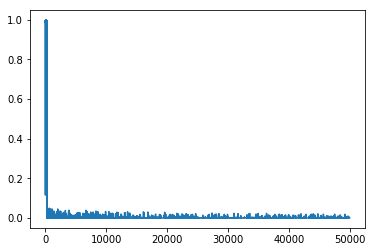

In [10]:
plt.plot(costs)

In [11]:
err_net = []
for i in range (0,5999):
    val = data_test.values[i,0]
    z = val*w1 + val*w2 + val*w3 + b
    pred = sigmoid (z)
    err = np.square(pred - ((data_test.values[i,1])))
    err_net.append(err)

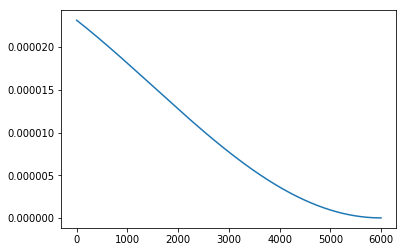

In [12]:
plt.plot(err_net)